In [ ]:


!pip install librosa scikit-learn pandas matplotlib --quiet


In [ ]:
import os
import pandas as pd
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [ ]:
# Encode text labels to numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # non_autistic = 0, autistic = 1

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print(f"🌲 Random Forest Accuracy: {rf_acc:.2f}")

ConfusionMatrixDisplay.from_predictions(y_test, rf_preds, display_labels=le.classes_, cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [ ]:
svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svm.fit(X_train, y_train)

svm_preds = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)
print(f"🤖 SVM Accuracy: {svm_acc:.2f}")

ConfusionMatrixDisplay.from_predictions(y_test, svm_preds, display_labels=le.classes_, cmap="Purples")
plt.title("SVM Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Train the model
svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svm.fit(X_train, y_train)

# Predictions
svm_preds = svm.predict(X_test)
svm_proba = svm.predict_proba(X_test)[:, 1]  # for ROC AUC (use [:, 1] for binary classification)

# Evaluation metrics
svm_acc = accuracy_score(y_test, svm_preds)
svm_prec = precision_score(y_test, svm_preds, average='weighted')
svm_rec = recall_score(y_test, svm_preds, average='weighted')
svm_f1 = f1_score(y_test, svm_preds, average='weighted')
svm_roc = roc_auc_score(y_test, svm_proba)

# Print results
print(f"🤖 SVM Accuracy:  {svm_acc:.2f}")
print(f"🎯 Precision:     {svm_prec:.2f}")
print(f"🔁 Recall:        {svm_rec:.2f}")
print(f"💥 F1-score:      {svm_f1:.2f}")
print(f"📈 ROC AUC:       {svm_roc:.2f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, svm_preds, display_labels=le.classes_, cmap="Purples")
plt.title("SVM Confusion Matrix")
plt.show()

# (Optional) ROC Curve
fpr, tpr, _ = roc_curve(y_test, svm_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("SVM ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/"
metadata = pd.read_csv('/content/drive/MyDrive/combined_metadata.csv')
print(metadata.head())

 01_03_21201007.ipynb
 02_03_21201007.ipynb
 03_03_21201007.ipynb
'05_Mashuk Jannat Mahima_21201007.gdoc'
'05_Mashuk Jannat Mahima_21201007.pdf'
 10_21201007_21201408_21201772_.ipynb
'16_21201007_MashukJannatMahima (1).pdf'
'16_21201007_MashukJannatMahima (2).pdf'
'16_21201007_MashukJannatMahima (3).pdf'
'16_21201007_MashukJannatMahima (4).pdf'
'16_21201007_MashukJannatMahima (5).pdf'
 16_21201007_MashukJannatMahima.pdf
 1sec_dataset
'21201007_03_critical review.gdoc'
'21201007_03_critical review.pdf'
 21201007_.7z
 21201007_Lab_04.zip
 21201007_Mahima_05_Lab06.ipynb
 21201007_mashukijannatmahima.py
 21201007_MashukJannatMahima_03.zip
 21201007_MashukJannatMahima_05.ipynb
 21201007_MashukJannatMahima_05.zip.zip
 21201007_MashukJannatMahima_06_CSE110Assignment07.ipynb
 21201007_MashukJannatMahima_06_CSE110Assignment6.ipynb
 21201007_MashukJannatMahima_06_CSEAssighnment5.ipynb
 21201007_MashukJannatMahima_06_CSEAssignment8.ipynb
 21201007_MashukJannatMahima_06_CSELabAssignment04.ipynb
 2

In [ ]:
def extract_mfcc(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc.T, axis=0)  # take average across time axis

# Extract features
features = []
labels = []

for idx, row in metadata.iterrows():
    try:
        mfcc_feat = extract_mfcc(row['filepath'])
        features.append(mfcc_feat)
        labels.append(row['label'])
    except Exception as e:
        print(f"⚠️ Error processing {row['filepath']}: {e}")

X = np.array(features)
y = np.array(labels)
print(f"✅ Extracted MFCCs for {len(X)} samples")

/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1152
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=896
  warnings.warn(


✅ Extracted MFCCs for 3747 samples


In [ ]:
# Encode text labels to numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # non_autistic = 0, autistic = 1

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

🌲 Random Forest Accuracy: 0.90
🎯 Precision:     0.8971
🔁 Recall:        0.8973
💥 F1-score:      0.8972
📈 ROC AUC:       0.9538


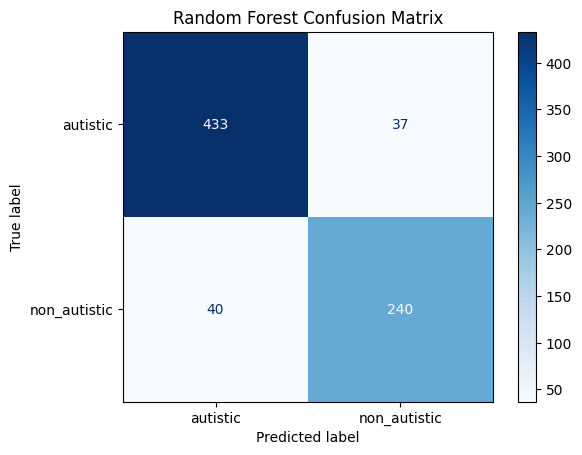

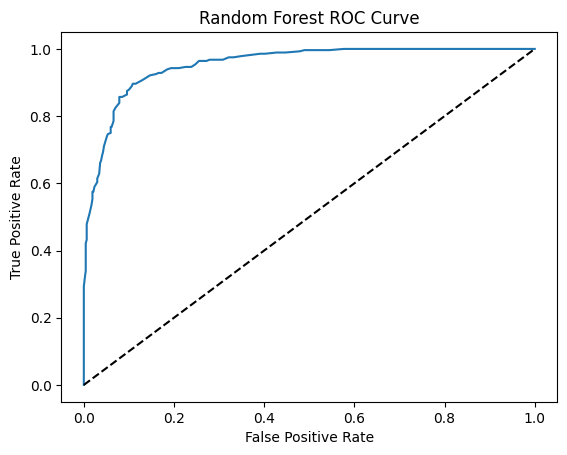

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1] # for ROC AUC

# Evaluation metrics
rf_acc = accuracy_score(y_test, rf_preds)
rf_prec = precision_score(y_test, rf_preds, average='weighted')
rf_rec = recall_score(y_test, rf_preds, average='weighted')
rf_f1 = f1_score(y_test, rf_preds, average='weighted')
rf_roc = roc_auc_score(y_test, rf_proba)


# Print results
print(f"🌲 Random Forest Accuracy: {rf_acc:.2f}")
print(f"🎯 Precision:     {rf_prec:.4f}")
print(f"🔁 Recall:        {rf_rec:.4f}")
print(f"💥 F1-score:      {rf_f1:.4f}")
print(f"📈 ROC AUC:       {rf_roc:.4f}")


ConfusionMatrixDisplay.from_predictions(y_test, rf_preds, display_labels=le.classes_, cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Random Forest ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

🤖 SVM Accuracy: 0.9227


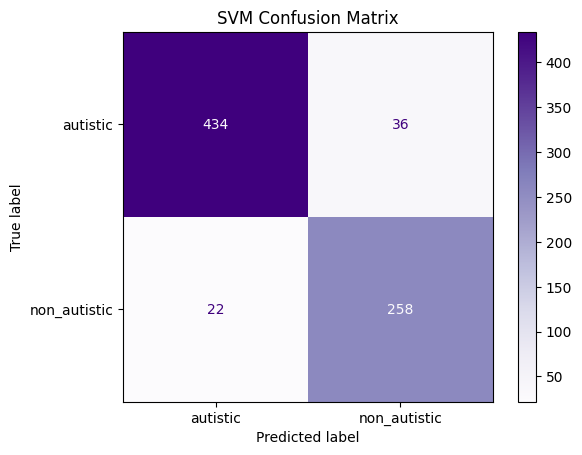

In [ ]:
svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svm.fit(X_train, y_train)

svm_preds = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)
print(f"🤖 SVM Accuracy: {svm_acc:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, svm_preds, display_labels=le.classes_, cmap="Purples")
plt.title("SVM Confusion Matrix")
plt.show()

🤖 SVM Accuracy:  0.9227
🎯 Precision:     0.9241
🔁 Recall:        0.9227
💥 F1-score:      0.9230
📈 ROC AUC:       0.9711


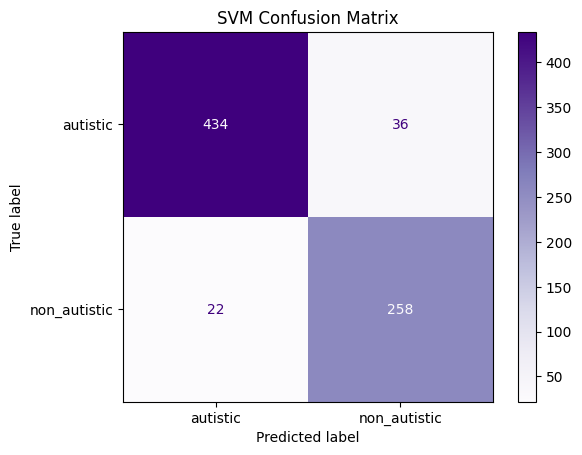

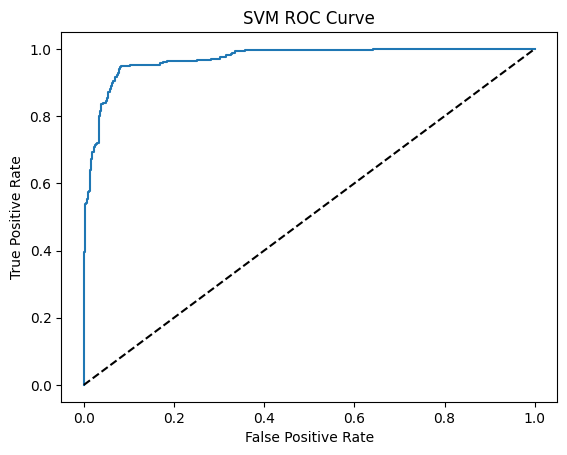

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Train the model
svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svm.fit(X_train, y_train)

# Predictions
svm_preds = svm.predict(X_test)
svm_proba = svm.predict_proba(X_test)[:, 1]  # for ROC AUC (use [:, 1] for binary classification)

# Evaluation metrics
svm_acc = accuracy_score(y_test, svm_preds)
svm_prec = precision_score(y_test, svm_preds, average='weighted')
svm_rec = recall_score(y_test, svm_preds, average='weighted')
svm_f1 = f1_score(y_test, svm_preds, average='weighted')
svm_roc = roc_auc_score(y_test, svm_proba)

# Print results
print(f"🤖 SVM Accuracy:  {svm_acc:.4f}")
print(f"🎯 Precision:     {svm_prec:.4f}")
print(f"🔁 Recall:        {svm_rec:.4f}")
print(f"💥 F1-score:      {svm_f1:.4f}")
print(f"📈 ROC AUC:       {svm_roc:.4f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, svm_preds, display_labels=le.classes_, cmap="Purples")
plt.title("SVM Confusion Matrix")
plt.show()

# (Optional) ROC Curve
fpr, tpr, _ = roc_curve(y_test, svm_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("SVM ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Extract features
features = []
labels = []

for idx, row in metadata.iterrows():
    try:
        mfcc_feat = extract_mfcc(row['filepath'])
        features.append(mfcc_feat)
        labels.append(row['label'])
    except Exception as e:
        print(f"⚠️ Error processing {row['filepath']}: {e}")

X = np.array(features)
y = np.array(labels)
print(f"✅ Extracted MFCCs for {len(X)} samples")

/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1152
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=896
  warnings.warn(


✅ Extracted MFCCs for 3747 samples
